Load in the data. The target column should be considered as whether a patient will develop 
heart disease or not.

In [1]:
#import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns


In [2]:
#load the data
Data = pd.read_csv('heart.csv')

In [3]:
Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The data is all numerical, no data of type object.
There seems to be no data missing - which is a good thing

Explore the data. Notice all columns are numerical. Therefore separate the continuous from 
the discrete features.

In [6]:
Numerical = [var for var in Data.columns if Data[var].dtype!='O']

In [7]:
#create an empty list known as discrete
Discrete = []
#Separate the discrete features and store them in the list discrete
for var in Numerical:
    if len(Data[var].unique())<20:
        print(var, ' values: ', Data[var].unique())
        Discrete.append(var)
print()
print('There are {} discrete variables'.format(len(Discrete)))

sex  values:  [1 0]
cp  values:  [3 2 1 0]
fbs  values:  [1 0]
restecg  values:  [0 1 2]
exang  values:  [0 1]
slope  values:  [0 2 1]
ca  values:  [0 2 1 3 4]
thal  values:  [1 2 3 0]
target  values:  [1 0]

There are 9 discrete variables


In [10]:
Continuous = [var for var in Numerical if var not in Discrete]
print(Continuous)
print()
print('There are {} continuous variables'.format(len(Continuous)))

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

There are 5 continuous variables


Identify any presence of outliers in the continuous features and resolve them using the IQR
method.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

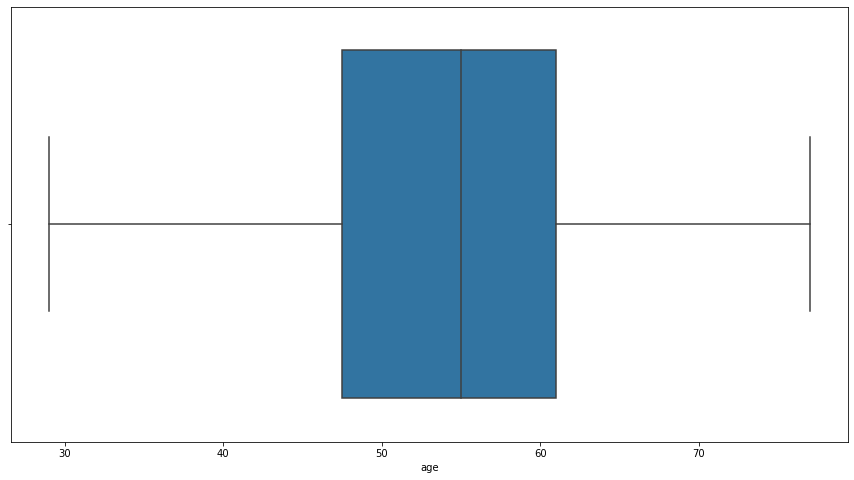

In [11]:
plt.figure(figsize=(15,8))
sns.boxplot(Data.age)

There are no outliers in the age column

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

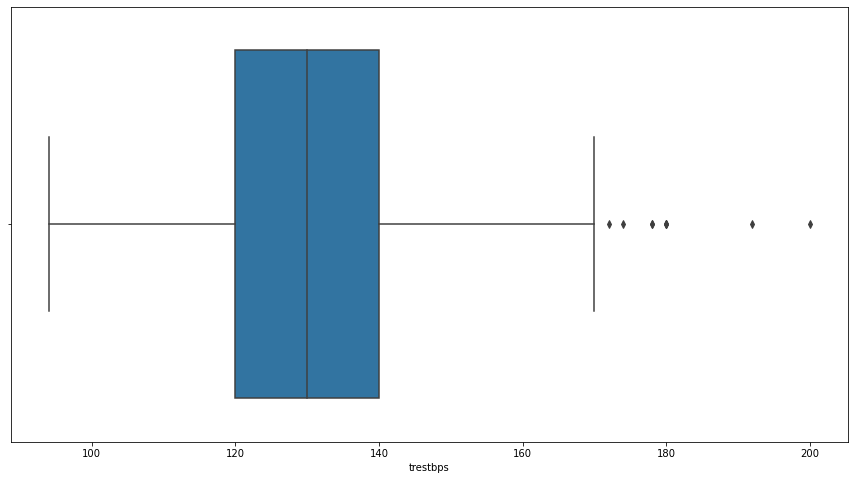

In [12]:
plt.figure(figsize=(15,8))
sns.boxplot(Data.trestbps)

Testbps shows some outliers.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

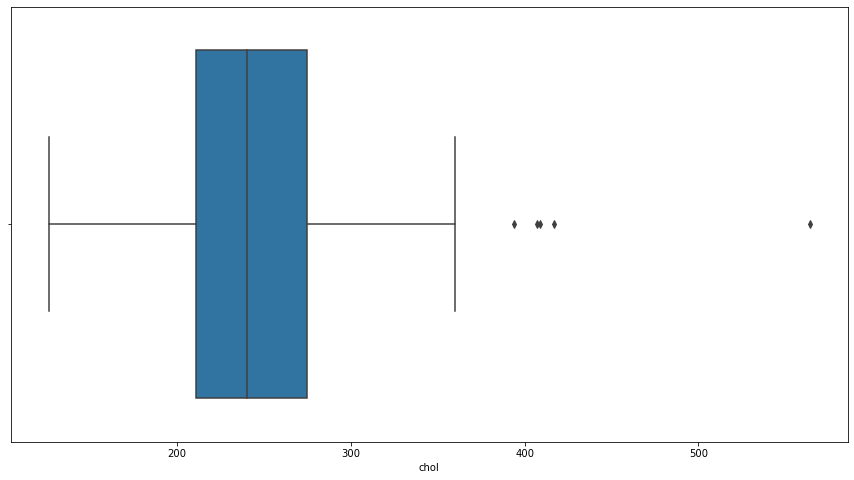

In [13]:
plt.figure(figsize=(15,8))
sns.boxplot(Data.chol)

Chol is also showing outliers

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

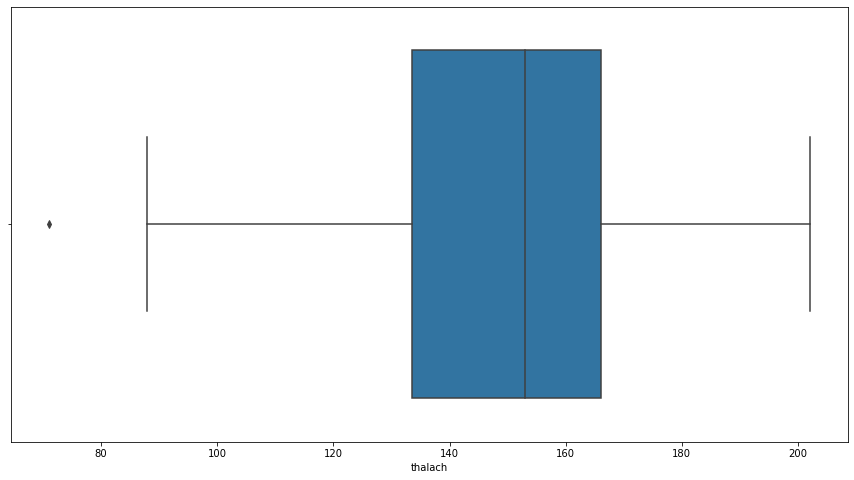

In [14]:
plt.figure(figsize=(15,8))
sns.boxplot(Data.thalach)

Thalach has very few outliers - one

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

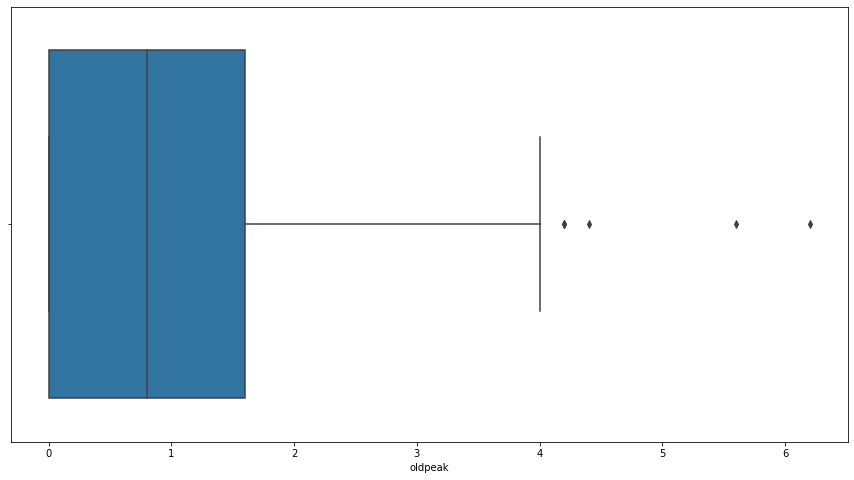

In [15]:
plt.figure(figsize=(15,8))
sns.boxplot(Data.oldpeak)

Oldpeak is also displaying some outliiers

Remove outliers

In [16]:
def remove_outliers(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = 1.5*iqr
    Lower = q25 - cutoff
    Upper = q75 + cutoff
    return Lower, Upper

In [17]:
Lower, Upper = remove_outliers(Data.trestbps)
Data = Data.loc[(Data.trestbps>Lower) & (Data.trestbps<Upper)]

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='trestbps'>

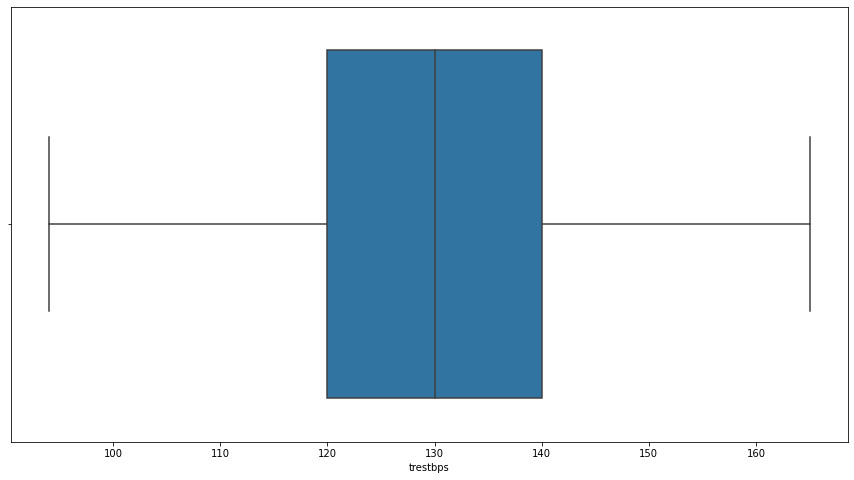

In [18]:
plt.figure(figsize=(15,8))
sns.boxplot(Data.trestbps)

We see no more outliers in Trestbps.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='chol'>

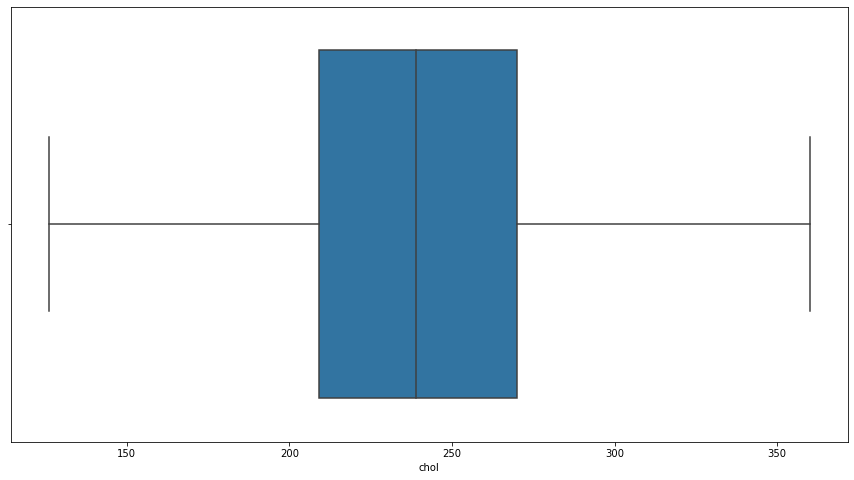

In [19]:
Lower, Upper = remove_outliers(Data.chol)
Data = Data.loc[(Data.chol>Lower) & (Data.chol<Upper)]
plt.figure(figsize=(15,8))
sns.boxplot(Data.chol)

Chol is also not showing outliers now.

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='thalach'>

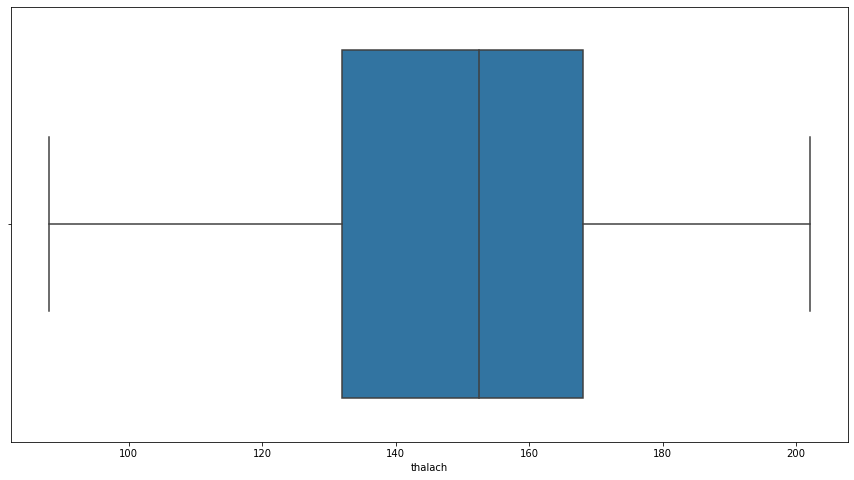

In [20]:
Lower, Upper = remove_outliers(Data.thalach)
Data = Data.loc[(Data.thalach>Lower) & (Data.thalach<Upper)]
plt.figure(figsize=(15,8))
sns.boxplot(Data.thalach)

Thalach is now showing no outliers

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='oldpeak'>

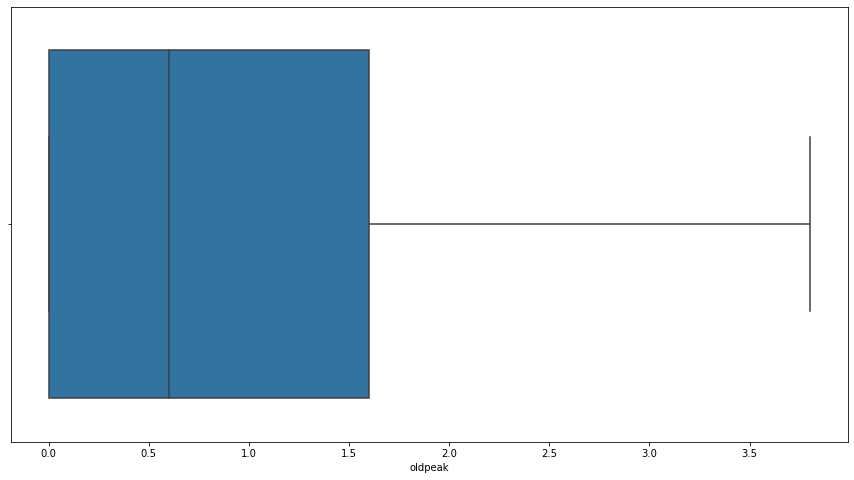

In [21]:
Lower, Upper = remove_outliers(Data.oldpeak)
Data = Data.loc[(Data.oldpeak>Lower) & (Data.oldpeak<Upper)]
plt.figure(figsize=(15,8))
sns.boxplot(Data.oldpeak)

Oldpeak is showing no more outliers.

Binned the continuous column values apart from the column ‘oldpeak’.
Therefore we will bin age, trestbps, chol, thalach.

In [22]:
Data['age_binned'] = pd.qcut(Data.age, q=[0, .25, .50, .75, 1])
Data['trestbps_binned'] = pd.qcut(Data.trestbps, q=[0, .25, .50, .75, 1])
Data['chol_binned'] = pd.qcut(Data.chol, q=[0, .25, .50, .75, 1])
Data['thalach_binned'] = pd.qcut(Data.thalach, q=[0, .25, .50, .75, 1])

Data.drop(columns=['age', 'trestbps', 'chol','thalach'], inplace=True)

Data.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age_binned,trestbps_binned,chol_binned,thalach_binned
0,1,3,1,0,0,2.3,0,0,1,1,"(60.0, 77.0]","(140.0, 165.0]","(209.5, 239.0]","(132.5, 153.0]"
1,1,2,0,1,0,3.5,0,0,2,1,"(28.999, 46.0]","(120.0, 130.0]","(239.0, 269.5]","(168.0, 202.0]"
2,0,1,0,0,0,1.4,2,0,2,1,"(28.999, 46.0]","(120.0, 130.0]","(125.999, 209.5]","(168.0, 202.0]"
3,1,1,0,1,0,0.8,2,0,2,1,"(54.0, 60.0]","(93.999, 120.0]","(209.5, 239.0]","(168.0, 202.0]"
4,0,0,0,1,1,0.6,2,0,2,1,"(54.0, 60.0]","(93.999, 120.0]","(269.5, 360.0]","(153.0, 168.0]"


In [23]:
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()

In [24]:
#applying Label Encoder on the binned features

Data['age'] = le.fit_transform(Data['age_binned'])
Data['trestbps'] = le.fit_transform(Data['trestbps_binned'])
Data['chol'] = le.fit_transform(Data['chol_binned'])
Data['thalach'] = le.fit_transform(Data['thalach_binned'])

Data.drop(columns=['age_binned','trestbps_binned', 'chol_binned','thalach_binned'],inplace=True)

Data.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,target,age,trestbps,chol,thalach
0,1,3,1,0,0,2.3,0,0,1,1,3,3,1,1
1,1,2,0,1,0,3.5,0,0,2,1,0,1,2,3
2,0,1,0,0,0,1.4,2,0,2,1,0,1,0,3
3,1,1,0,1,0,0.8,2,0,2,1,2,0,1,3
4,0,0,0,1,1,0.6,2,0,2,1,2,0,3,2


Separate the features from the labels and use the most appropriate feature selection 
technique(s).

In [25]:
X = Data.drop('target', 1)
y = Data['target']

In [26]:
X.head()

,sex,cp,fbs,restecg,exang,oldpeak,slope,ca,thal,age,trestbps,chol,thalach
0,1,3,1,0,0,2.3,0,0,1,3,3,1,1
1,1,2,0,1,0,3.5,0,0,2,0,1,2,3
2,0,1,0,0,0,1.4,2,0,2,0,1,0,3
3,1,1,0,1,0,0.8,2,0,2,2,0,1,3
4,0,0,0,1,1,0.6,2,0,2,2,0,3,2


In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

Using filter method

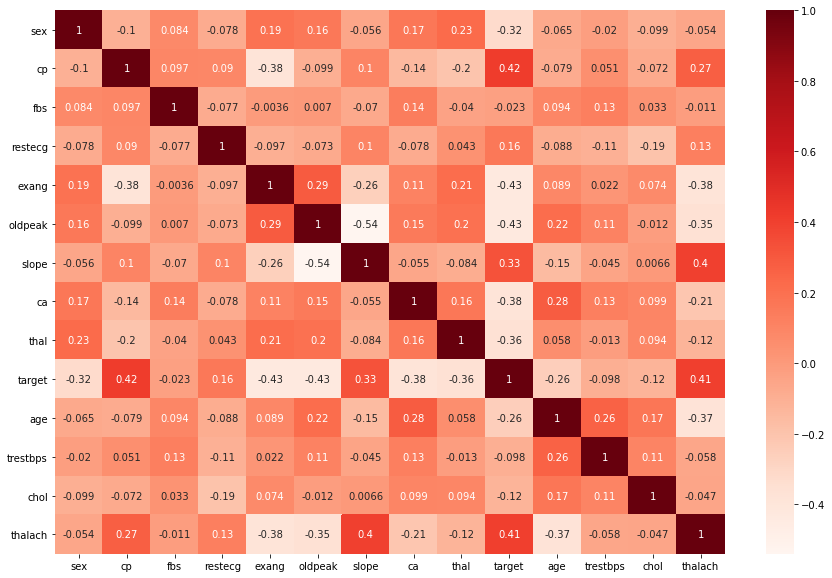

In [28]:
#Applying Pearson Correlation
plt.figure(figsize=(15,10))
cor = Data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [29]:
#Applying output variable to the coreelation
cor_target = abs(cor["target"])
cor_target 

sex         0.322104
cp          0.420460
fbs         0.022651
restecg     0.163819
exang       0.425735
oldpeak     0.427400
slope       0.327301
ca          0.379540
thal        0.358205
target      1.000000
age         0.255598
trestbps    0.098054
chol        0.120902
thalach     0.405516
Name: target, dtype: float64

In [36]:
#Selecting the features
relevant_features = cor_target[cor_target>0.35]
relevant_features

cp         0.420460
exang      0.425735
oldpeak    0.427400
ca         0.379540
thal       0.358205
target     1.000000
thalach    0.405516
Name: target, dtype: float64

Using a corelation threshold of 0.35, the features selected are cp, exang, oldpeak, ca, thal and thalach.

Investigating the correlation among the features themselves

In [37]:
print(Data[["cp","exang"]].corr())
print(Data[["cp","oldpeak"]].corr())
print(Data[["cp","ca"]].corr())
print(Data[["cp","thal"]].corr())
print(Data[["cp","thalach"]].corr())

             cp     exang
cp     1.000000 -0.377618
exang -0.377618  1.000000
               cp   oldpeak
cp       1.000000 -0.098885
oldpeak -0.098885  1.000000
          cp        ca
cp  1.000000 -0.144538
ca -0.144538  1.000000
            cp      thal
cp    1.000000 -0.203099
thal -0.203099  1.000000
               cp   thalach
cp       1.000000  0.274674
thalach  0.274674  1.000000


Using our threshold of 0.35, cp and exang are highly corelated. So we will keep exang as it is highly correlated to target and drop cp

In [39]:
print(Data[["exang","oldpeak"]].corr())
print(Data[["exang","ca"]].corr())
print(Data[["exang","thal"]].corr())
print(Data[["exang","thalach"]].corr())

            exang   oldpeak
exang    1.000000  0.293733
oldpeak  0.293733  1.000000
         exang       ca
exang  1.00000  0.11255
ca     0.11255  1.00000
          exang      thal
exang  1.000000  0.214783
thal   0.214783  1.000000
            exang   thalach
exang    1.000000 -0.380342
thalach -0.380342  1.000000


Using our threshold of 0.35, thalach and exang are highly corelated. So we will keep exang as it is highly correlated to target and drop thalach

In [41]:
print(Data[["oldpeak","ca"]].corr())
print(Data[["oldpeak","thal"]].corr())

          oldpeak        ca
oldpeak  1.000000  0.152406
ca       0.152406  1.000000
         oldpeak    thal
oldpeak   1.0000  0.1968
thal      0.1968  1.0000


In [42]:
print(Data[["ca","thal"]].corr())

            ca      thal
ca    1.000000  0.164986
thal  0.164986  1.000000


Therefore the final selected features are exang, oldpeak, ca and thal.

In [43]:
X.columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'oldpeak', 'slope', 'ca',
       'thal', 'age', 'trestbps', 'chol', 'thalach'],
      dtype='object')

In [45]:
X = X.drop(['sex','cp','fbs','restecg','slope','age','trestbps','chol','thalach'], 1)

In [46]:
X.head()

,exang,oldpeak,ca,thal
0,0,2.3,0,1
1,0,3.5,0,2
2,0,1.4,0,2
3,0,0.8,0,2
4,1,0.6,0,2


Slice the data and scale the features.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [49]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223 entries, 143 to 39
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   exang    223 non-null    int64  
 1   oldpeak  223 non-null    float64
 2   ca       223 non-null    int64  
 3   thal     223 non-null    int64  
dtypes: float64(1), int64(3)
memory usage: 8.7 KB


In [50]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 12 to 176
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   exang    56 non-null     int64  
 1   oldpeak  56 non-null     float64
 2   ca       56 non-null     int64  
 3   thal     56 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.2 KB


In [51]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

X_train = pd.DataFrame(StandardScaler().fit_transform(X_train), columns=X_train.columns)
X_train.head()

,exang,oldpeak,ca,thal
0,-0.655353,-0.593456,1.378411,-0.511734
1,-0.655353,-0.803354,-0.670827,-0.511734
2,1.525896,-0.068711,0.353792,1.191499
3,-0.655353,0.246136,-0.670827,-0.511734
4,-0.655353,-0.383558,-0.670827,1.191499


Identify the data if the data is balanced. If not, sample the data using the most appropriate
method keeping the size of the data in mind.

In [52]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [53]:
y=pd.DataFrame(y)

In [54]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [55]:
target_0 = y[y.target == 0].target.count() / y.target.count()
target_1 = y[y.target == 1].target.count() / y.target.count()

print(target_0)
print(target_1)

0.4336917562724014
0.5663082437275986


In [57]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=42)

X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)
print(Counter(y_train_over))

Counter({1: 130, 0: 130})


In [59]:
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()

X_train_under, y_train_under = undersample.fit_resample(X_train, y_train)
print(Counter(y_train_under))

Counter({0: 93, 1: 93})


In [66]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE(random_state=42)

X_test_over, y_test_over = oversample.fit_resample(X_test, y_test)
print(Counter(y_test_over))

Counter({1: 28, 0: 28})


In [67]:
y_train_under.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Using at least 4 classification methods, identify the best machine learning model using their 
training and testing accuracy scores.

In [68]:
# Models to be tested: L ogistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [69]:

classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [70]:
#Compute the training score of each of the models

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_over, y_train_over)
    train_score = round(classifier.score(X_train_over, y_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(X_test_over, y_test_over),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.79, 0.86, 0.85, 0.94, 0.94]
[0.5, 0.5, 0.5, 0.54, 0.48]


In [71]:
from sklearn.model_selection import cross_val_score

train_cross_scores = []
test_cross_scores = []

for key, classifier in classifiers.items():
    classifier.fit(X_train_over, y_train_over)
    train_score = cross_val_score(classifier, X_train_over, y_train_over, cv=5)
    train_cross_scores.append(round(train_score.mean(),2))
    test_score = cross_val_score(classifier, X_test_over, y_test_over, cv=5)
    test_cross_scores.append(round(test_score.mean(),2))
    
print(train_cross_scores)
print(test_cross_scores)

[0.8, 0.82, 0.82, 0.8, 0.83]
[0.72, 0.7, 0.79, 0.78, 0.79]


The best model is Random Forest from the Cross Val scores

Hyper parameter tune the best model using grid search to identify the best performing 
model

In [74]:
from sklearn.model_selection import RandomizedSearchCV

# Different RandomForestclassifier hyperparameters
rf_grid = {"n_estimators": np.arange(10, 150, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=2,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train_over, y_train_over)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


RandomizedSearchCV(cv=2,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140])},
                   verbose=True)

In [75]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 1,
 'max_depth': 10}

In [76]:
model = RandomForestClassifier(n_estimators=70, min_samples_split=2, min_samples_leaf=3, max_features=1, max_depth=10)

In [77]:
model.fit(X_train_over, y_train_over)

RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=3,
                       n_estimators=70)

In [79]:
model.fit(X_test_over, y_test_over)

RandomForestClassifier(max_depth=10, max_features=1, min_samples_leaf=3,
                       n_estimators=70)

In [80]:
train_score = round(model.score(X_train_over, y_train_over),2)

In [81]:
test_score = round(model.score(X_test_over, y_test_over),2)

In [82]:
print(train_score)
print(test_score)

0.62
0.86


In [83]:
score = cross_val_score(model, X_train_over, y_train_over, cv=5)
print(score)

[0.86538462 0.80769231 0.76923077 0.84615385 0.86538462]


In [84]:
test_score = cross_val_score(model, X_test_over, y_test_over, cv=5)
print(score)

[0.86538462 0.80769231 0.76923077 0.84615385 0.86538462]


In [85]:
y_preds = model.predict(X_test_over)

In [86]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test_over, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        28
           1       0.81      0.93      0.87        28

    accuracy                           0.86        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.86      0.86      0.86        56



In [87]:
conf_mat = confusion_matrix(y_test_over, y_preds)
conf_mat

array([[22,  6],
       [ 2, 26]], dtype=int64)

In [88]:
accuracy_score(y_test_over, y_preds)

0.8571428571428571

In [89]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
model_pred = cross_val_predict(model, X_test_over, y_test_over, cv=5)
print(roc_auc_score(y_test_over, model_pred))

0.7321428571428571


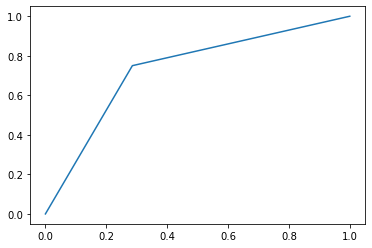

In [90]:
fpr, tpr, _ = roc_curve(y_test_over, model_pred)
plt.plot(fpr, tpr)
plt.show()

Save the model as ‘classification_model’

In [91]:
import pickle

pickle.dump(model, open("classification_model.pkl", "wb"))